In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# filepath for csv (make sure to use your own filepath here this is for my local desktop)
file_path = 'C:/Users/Cameron/Desktop/Assignment1 - CS5530/StudentsPerformance.csv'
students_performance = pd.read_csv(file_path)
students_performance.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


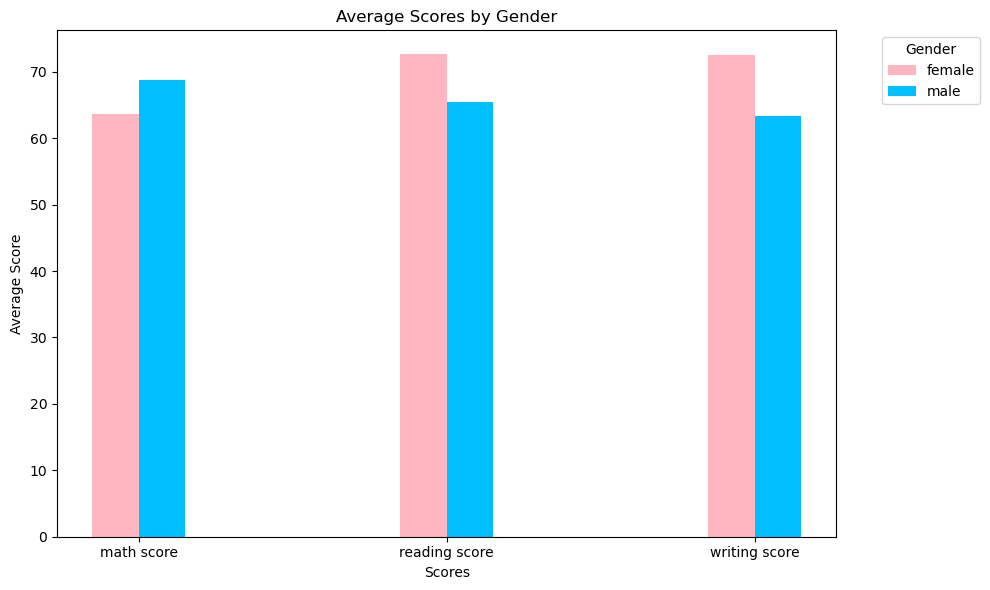

In [38]:
# average score
average_scores_by_gender = students_performance.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

# color map
gender_colors = {'female': 'lightpink', 'male': 'deepskyblue'}

#Plot
fig, ax = plt.subplots(figsize=(10, 6))
legend_labels = {}
for i, score in enumerate(scores):
    for j, gender in enumerate(genders):
        pos = i - bar_width/2 if gender == 'female' else i + bar_width/2
        avg_score = average_scores_by_gender.loc[average_scores_by_gender['gender'] == gender, score].iloc[0]
        bar_handle = ax.bar(pos, avg_score, bar_width, color=gender_colors[gender])
        legend_labels[gender] = bar_handle

#Axes and legend
ax.set_xticks(positions)
ax.set_xticklabels(scores)
ax.set_xlabel('Scores')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores by Gender')

ax.legend([legend_labels['female'][0], legend_labels['male'][0]], ['female', 'male'], title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# printing plot
plt.show()


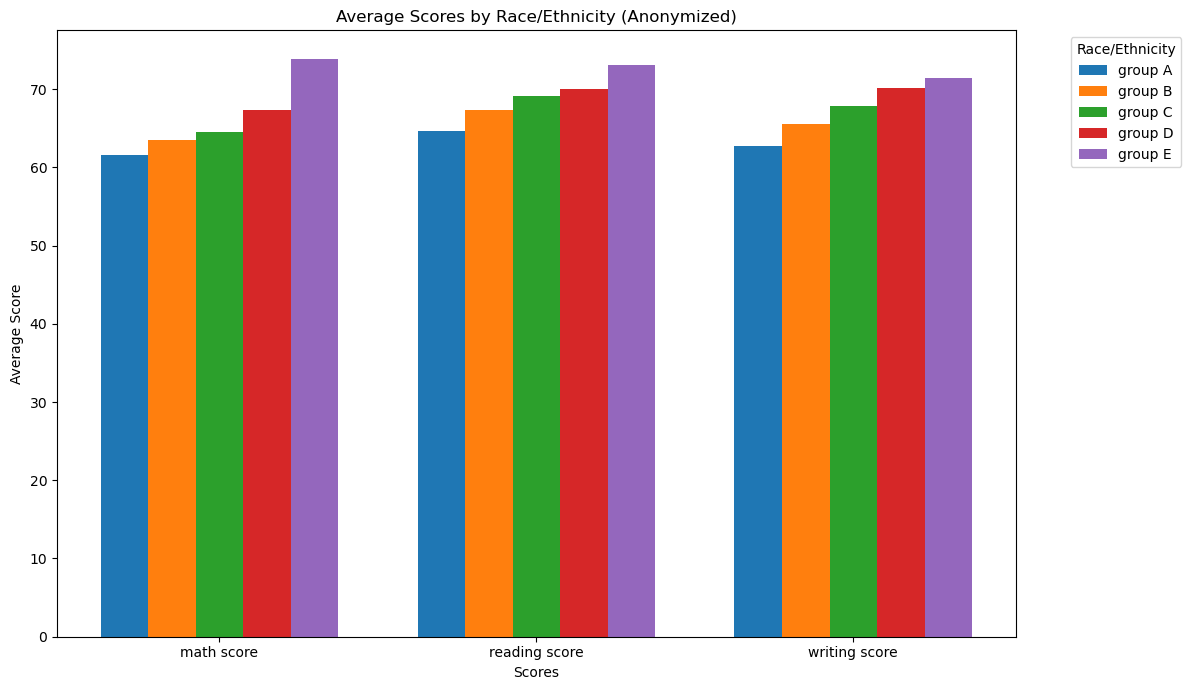

In [40]:
#bar spacing & dimensions
bar_width = 0.15  
positions = np.arange(len(scores))  

# bar chart
fig, ax = plt.subplots(figsize=(12, 7)) 

# Plot
for i, score in enumerate(scores):
    for j, race in enumerate(races):
        pos = positions[i] + (j - (len(races) - 1) / 2) * bar_width
        avg_score = average_scores_by_race.loc[average_scores_by_race['race/ethnicity'] == race, score].iloc[0]
        ax.bar(pos, avg_score, bar_width, color=race_colors[j % len(race_colors)])

# Axes, labels and legend
ax.set_xticks(positions)
ax.set_xticklabels(scores)
ax.set_xlabel('Scores')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores by Race/Ethnicity (Anonymized)')
ax.legend(sorted(races), title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# printing plot
plt.show()



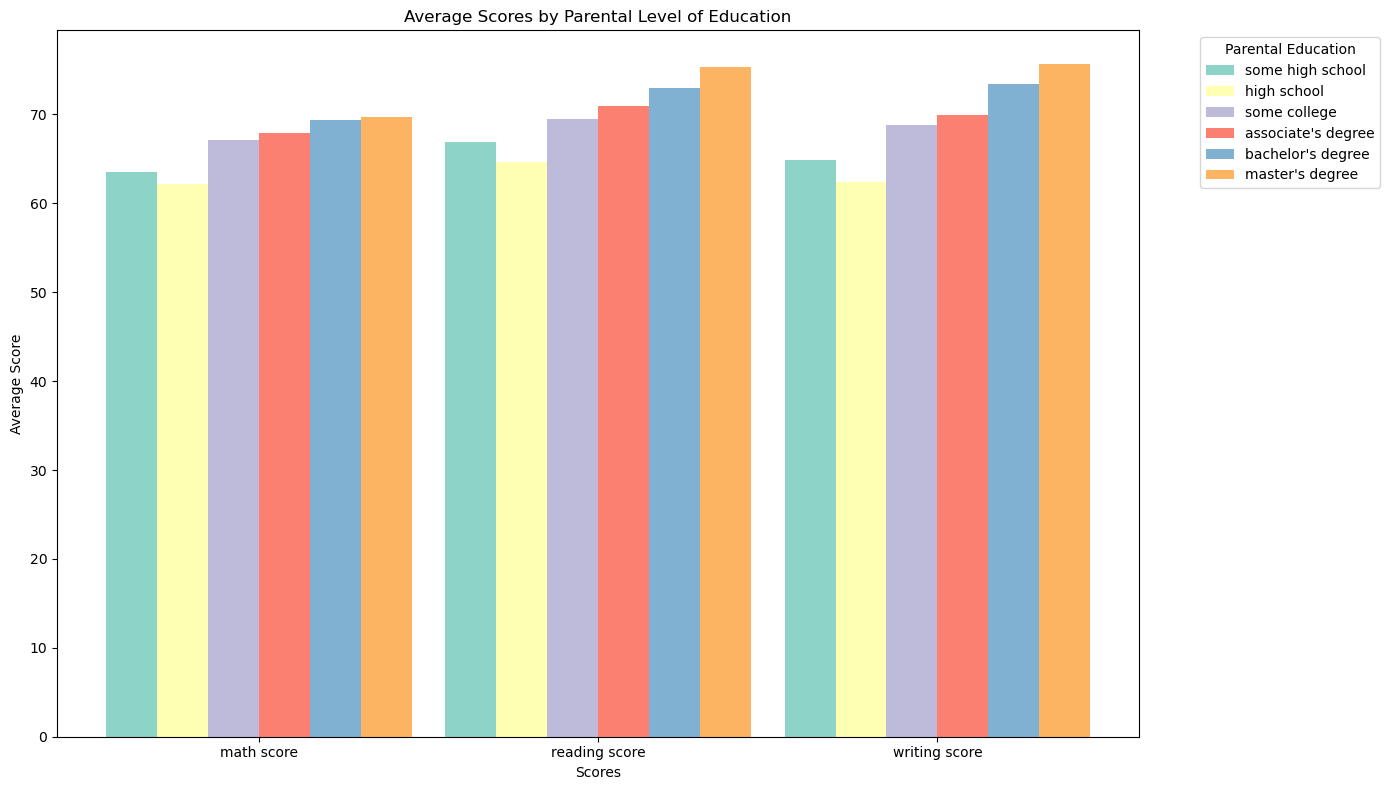

In [41]:
#order of education from lowest to highest
education_order = [
    'some high school', 'high school', 'some college',
    'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'
]

# avg scores
average_scores_by_parent_education = students_performance.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()

# modifying the df by the education order
average_scores_by_parent_education['parental level of education'] = pd.Categorical(
    average_scores_by_parent_education['parental level of education'],
    categories=education_order,
    ordered=True
)
average_scores_by_parent_education = average_scores_by_parent_education.sort_values('parental level of education')

# bar chart
parent_education_colors = plt.cm.Set3.colors
bar_width = 0.15
positions = np.arange(len(scores))

fig, ax = plt.subplots(figsize=(14, 8))

# plot
for i, score in enumerate(scores):
    for j, parent_education in enumerate(average_scores_by_parent_education['parental level of education']):
        # Calculate the position of the bar
        pos = positions[i] + (j - (len(education_order) - 1) / 2) * bar_width
        # Get the average score for the parental education level
        avg_score = average_scores_by_parent_education.loc[average_scores_by_parent_education['parental level of education'] == parent_education, score].iloc[0]
        # Create the bar and capture the handle
        ax.bar(pos, avg_score, bar_width, color=parent_education_colors[j % len(parent_education_colors)])

# Axes, labels and legend
ax.set_xticks(positions)
ax.set_xticklabels(scores)
ax.set_xlabel('Scores')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores by Parental Level of Education')
ax.legend(education_order, title='Parental Education', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# printing plot
plt.show()



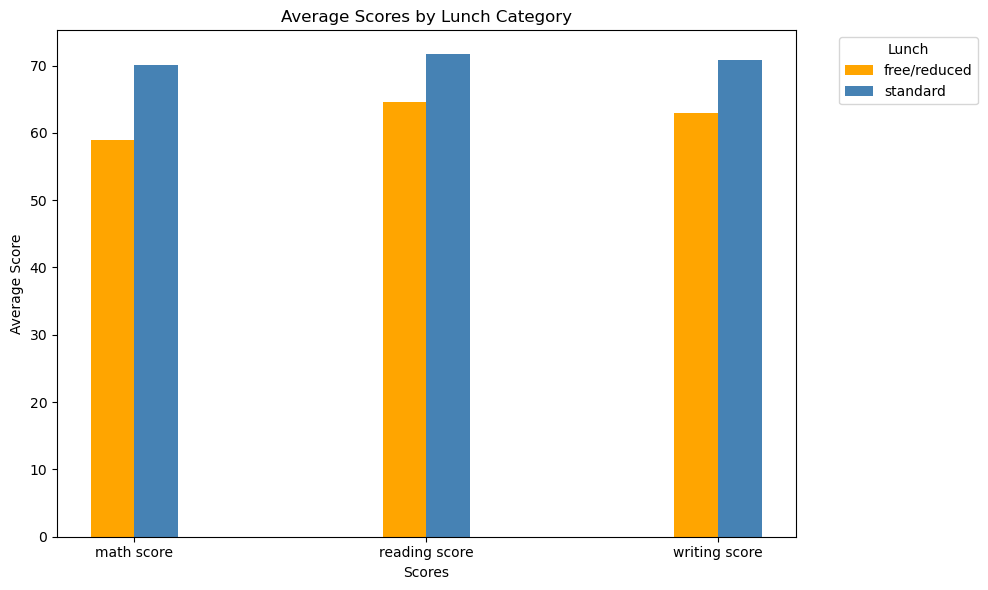

In [42]:
# avg score
average_scores_by_lunch = students_performance.groupby('lunch')[['math score', 'reading score', 'writing score']].mean().reset_index()

# bar chart 
lunch_colors = {'standard': 'steelblue', 'free/reduced': 'orange'}
fig, ax = plt.subplots(figsize=(10, 6))
lunch_categories = average_scores_by_lunch['lunch'].unique()

#plot
for i, score in enumerate(scores):
    for j, lunch in enumerate(lunch_categories):
        # Calculate the position of the bar
        pos = positions[i] + (j - 0.5) * bar_width
        # Get the average score for the lunch category
        avg_score = average_scores_by_lunch.loc[average_scores_by_lunch['lunch'] == lunch, score].iloc[0]
        # Create the bar and capture the handle
        ax.bar(pos, avg_score, bar_width, color=lunch_colors[lunch])

# axes, labels, and legend
ax.set_xticks(positions)
ax.set_xticklabels(scores)
ax.set_xlabel('Scores')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores by Lunch Category')
ax.legend(lunch_categories, title='Lunch', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# printing plot
plt.show()


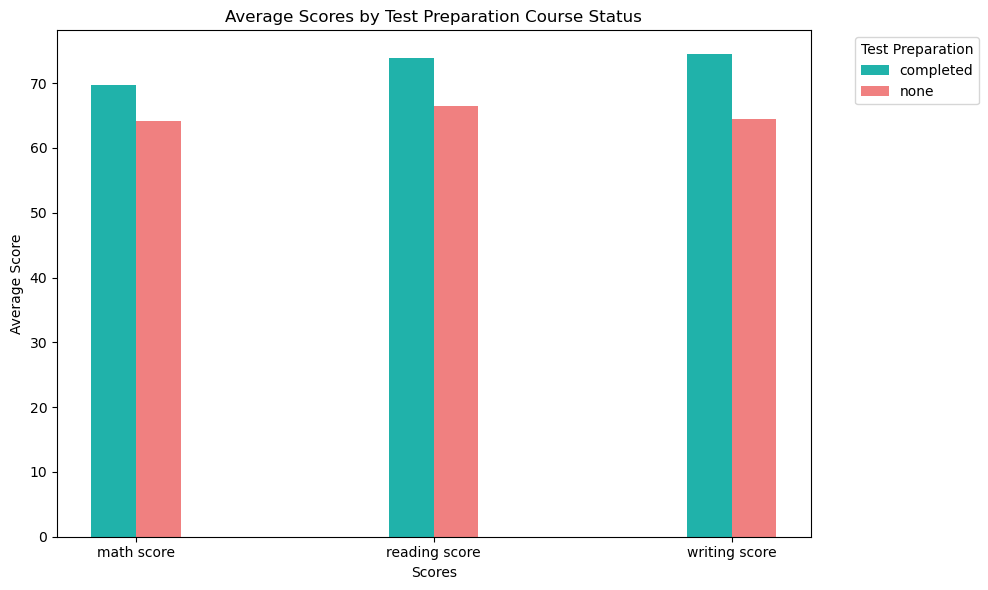

In [43]:
# avg score
average_scores_by_test_preparation = students_performance.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().reset_index()

# bar chart
test_preparation_colors = {'none': 'lightcoral', 'completed': 'lightseagreen'}
fig, ax = plt.subplots(figsize=(10, 6))
test_preparation_statuses = average_scores_by_test_preparation['test preparation course'].unique()

# plot
for i, score in enumerate(scores):
    for j, test_preparation in enumerate(test_preparation_statuses):
        # Calculate the position of the bar
        pos = positions[i] + (j - 0.5) * bar_width
        # Get the average score for the test preparation status
        avg_score = average_scores_by_test_preparation.loc[average_scores_by_test_preparation['test preparation course'] == test_preparation, score].iloc[0]
        # Create the bar and capture the handle
        ax.bar(pos, avg_score, bar_width, color=test_preparation_colors[test_preparation])

# axes, labels and legend
ax.set_xticks(positions)
ax.set_xticklabels(scores)
ax.set_xlabel('Scores')
ax.set_ylabel('Average Score')
ax.set_title('Average Scores by Test Preparation Course Status')
ax.legend(test_preparation_statuses, title='Test Preparation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# printing plot
plt.show()
